#### Model Evaluation & selection

- Accuracy is widely used, but many other are possible:
    - User satisfaction (Web search)
    - Amount of revenue (e-commerce)
    - Increse in patient survivales rates (medical)
- Accuaracy with Imbalanced Classes:
    - Suppose yoy have two classes:
        - Relevant(R): the positive class
        - Not_relevant (N): the negative class
    - Out of 1000 randomly selected intem, on average
        - One item is relevant and has R label
        - The rest of items (999 of them) are not relevant and labelled N.
    - Recall that:

    $$Accuracy=\frac{\#Correct\ predictions}{\#total\ instances}$$

    - Assuming a test set of 1000 instances, what would this dummy classifier's accuracy be?
        Answer:  
        
        $$Accuracy_{Dummy}=\frac{999}{1000}=99.9\%$$

In [19]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [20]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [21]:
np.bincount(y_binary_imbalanced)    # Negative class (0) is the most frequent class

array([1615,  182])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

#### Dummy Classifiers

DummyClassifier is a classifier that makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers, especially with imbalanced classes.

- Dummy classifiers serve as a sanity check on your classifier's perfomance
- They provide a null metric (e.g null accuaracy) baseline
- Dummy classifiers should not be used for real problems
- Some commonly-used settings for the strategy parameter for DummyClassifier in scikit-learn:
    - most_frequent: Predicts the most frequent label in the training set.
    - stratified: random predictions based on training set class distribution
    - uniform: Generates predictions unifromly at random
    - mean: predicts the mean of the training targets
    - median: predicts the media of the training targets
    - quantile: predicts a user-provided quantile of the training targets
    - Constant: Always predicts a constant label provided by the user
        A major motivation of this method is FI-scoring when the positive class is in the monority
- What if my classifier accuaracy is close to the null accuracy baseline?
This could be a sing of:
    - Inefective, erroneous or missing features
    - Poor choice of kernel or hyperparameter
    - Large class imbalance

In [23]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [25]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

#### Binary Prediction Outcomes 

TP= true positive 
FP = false positive (Type I Error)
TN = true negative
FN= false negtive (Type II error)


#### Binary (two-class) confusion matrix:

In [26]:
from sklearn.metrics import confusion_matrix

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [27]:
# produces random predictions w/ same class proportion as training set
dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[362  45]
 [ 35   8]]


In [28]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]


In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


/home/mauricio/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


#### Confusion Matrices & basic Evaluation Metrics

- Accuaracy:
$$ Accuracy= \frac{TN+TP}{TN+TP+FN+FP}$$

- Classification Error (1-accuracy\): for what fraction of all instances is the classifier's predicion incorrect?

     $$ ClassificationError = \frac{FP+FN}{TN+TP+FN+FP}$$

- Recall, or True Positive Rate (TPR), (Sensitivity or probability of detection): what fraction of all positive instances does the clasifier correctly identify as positive?

$$Recall = \frac{TP}{TP+FN}$$

- Precision: What fraction of positive predictions are correct?
$$Precision=\frac{TP}{TP+FP}$$

How to decide what metric to apply
     
     - Is it more importat to avoid false positives, or false negatives?
     - Precision is used as metric when our objective is to minimize false positives
     - Recall is used when the objetive is to minimize false negatives

- False positive rate (FPR) (also known as Specificity): What fraction of all negative instances does the classifier incorrectly indetify as positive?

$$FPR=\frac{FP}{TN+FP}$$

- There is often a tradeoff between precision and recall

     - Recall-oriented machine learning tasks:
          - Search and information extraction in legal discovery
          - Tumor detection
          - Often paired with a human exper to filter out false positives
     - Precision-oriented machine learning task:
          - Search engine ranking, query suggestion
          - Document classification
          - Many customer-facing task (users remember failures)

- FI-score: combining precision & recall into a single number:

$$F_1=2 \times \frac{Precision \times recall}{Precision+Recall}=\frac{2TP}{2TP+FN+FP}$$

$$F_{\beta}=(1+\beta^2)\times\frac{Precision \times Recall}{(\beta^2 \times Precision + Recall)}
 = \frac{(1+\beta^2)TP}{(1+\beta^2)TP+\beta FN + FP}$$

 - $\beta$ allows adjustment of the metric to control the emphasis on recall vs precision
     - Precision-oriente users: $\beta=0.5$ (false positives hurt performance more than false negatives)
     - Recall-oriented users: $\beta=2$ (false negatives hirt performance more than false positive)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [32]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [15]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.89      0.89       407
           1       0.06      0.07      0.07        43

    accuracy                           0.81       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.82      0.81      0.81       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

#### Classifier Decision Functions

- Each classifier score value per test point indicates how confidently the classifier predicts the positive class 

- Choosing a fixed decision threshold gives a classification rule.
- By sweeping the decision threshold through the entire range of possile score values, we get a series of classification outcomes that form a curve

- Predicted  Probability of Class Membership (predict_proba)
    - Typical rule: Choose most likely class
        - e.g class I if thresold > 0.50
    - Adjusting threshold affects predictions of classifier
    - Higher threshold results in a more conservative classifier
        - e.g. only predic Class I if estimated probability of class I is above 70%
        - This increases precision. Doesn't predict class I as often, but when it does, it gets high proportion of class I instances correct.
    - Not all models provide realistic probability estimates

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

/home/mauricio/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828775799085854),
 (0, -19.382829508812186),
 (0, -29.19857279390273),
 (0, -21.746339374763863),
 (0, -22.642366278691963),
 (0, -11.805890930252485),
 (1, 6.496003146234195),
 (0, -23.35464428931671),
 (0, -27.544002175175844),
 (0, -26.888208464659),
 (0, -31.863103822353274),
 (0, -22.486056923282575),
 (0, -25.31804291703262),
 (0, -13.384496389620132),
 (0, -13.565660577691062),
 (0, -13.308326294818325),
 (1, 12.181016309684122),
 (0, -34.36239978496709),
 (0, -13.231563758676153),
 (0, -29.594006620707106)]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

/home/mauricio/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.1105222607334101e-13),
 (0, 3.8207102104876396e-09),
 (0, 2.0855516800910965e-13),
 (0, 3.594883393191682e-10),
 (0, 1.467389029470996e-10),
 (0, 7.460423389729177e-06),
 (1, 0.9984928147919592),
 (0, 7.197917395426831e-11),
 (0, 1.0909173423170056e-12),
 (0, 2.1018389484343245e-12),
 (0, 1.4522113730930986e-14),
 (0, 1.7156534123072526e-10),
 (0, 1.0104473018087254e-11),
 (0, 1.5388149843410323e-06),
 (0, 1.2838311537693563e-06),
 (0, 1.6606060108726858e-06),
 (1, 0.9999948731618639),
 (0, 1.1928872272560515e-15),
 (0, 1.7930982798298833e-06),
 (0, 1.4043851456038233e-13)]

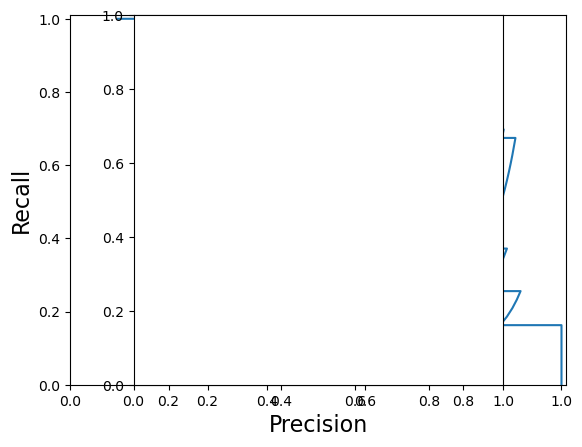

In [34]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

#### Precision-Recall Curves 

- X-axis: Precision
- Y-axis: Recall

Top right corner:
- The "ideal" point
- Precision = 1.0
- Recall = 1.0

"Steepness" of P-R curves
is important:

- Maximize precision
- While maximigiz recall

ROC Curves:

- X-axis: False positive Rate
- Y-axis: True Positive Rate

Top left corner:

- The "ideal" point
- False positive rate of zero
- True positive rate of one

"steepness" of ROC curves is important:
- Maximize the true positive rate
- While minimizing the false positive rate

Summarizing an ROC curve in one number: Area Under the Curve (AUC)

- Advantages:
    - Gives a single number for easy comparasion
    - Does not require specifying a decision threshold

- Drawbacks:
    - As with other single-number metrics, AUC loses information, e.g about tradeoffs and the shape of the ROC curve
    - This may be a factor to consider when e.g wanting to compare the performance of classifiers with overlapping ROC curves

/home/mauricio/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


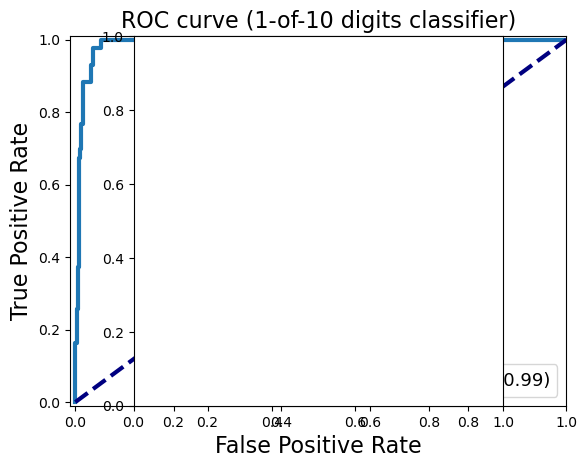

In [35]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


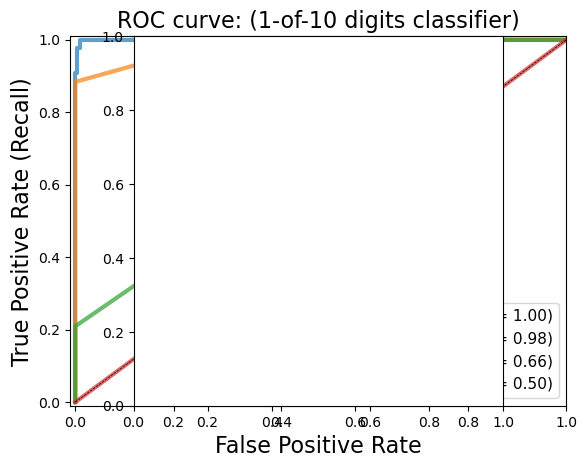

In [36]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

#### Multi-Class Evaluation

- Multi-class evaluation is an extension of the binary case
    - A collection of true vs predicted binary outcomes, one per class
    - Confusion matrices are especially useful
    - Classification report

- Overall evaluation metrics are averages across classes
    - But there are different ways to average multi-class results
    - The support (number of instances) for each class is important to consider, e.g in case of imbalanced classes

- Multi-label classification: Each instance can have multiple labels

- Macro-average:
    - Each class has equal weight

    1. Compute metric within each class
    2. Average resulting metrics across classes

- Micro-average:
    - Each instance has equal weight
    - Largest classes have most influence

    1. Agregate outcomes across al classes
    2. Compute metric with aggregate outcomes

- If the classes have about the same number of instances, macro-and micro-average will be about the same.

- If some classes are much larger (more instances) than other and you want to:
    - Weight your metric toward the largest ones, use micro-averaging.
    - Weight your metric toward the smallest ones, use macro-averaging

- If the micro-average is mucho lower tha the macro-averge then examine the larger classes for poor metric performance

- If the macro-average is mucho lower than the micro-average then examine the samller classes for poor metric performance


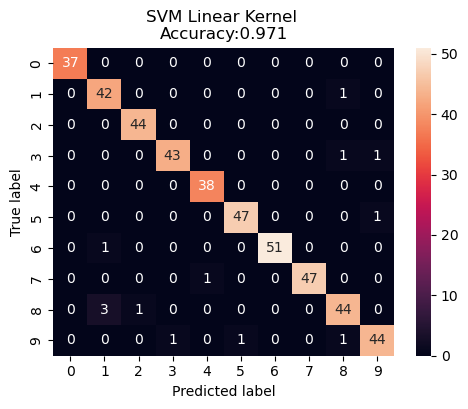

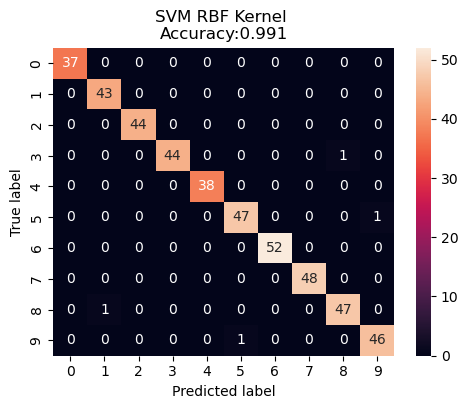

In [37]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [38]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [39]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [40]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


#### Regression Evaluation

- Typically r2_score is enough
    - Reminder: computes how well future instances will be predicted
    - Best possible scores is 1.0
    - Constant prediction score is 0.0

- Alternative metrics include:
    - mean_absolute_error (absolute difference of targe & predicted values)
    - mean_squared_error (squared difference of target & predicted values)
    - median_absolute_error (robust to outliers)

    The Dummy regressor class implements four simple baseline rules for regression, using the strategy parameter:
    - mean predicts the mean of the training targe values.
    - median predicts the median of the training target values
    - quantile predicts a user-provided quantile of the training target values, (e.g value at 75th percentile)
    - constant predicts a custom constant value provided by the user

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


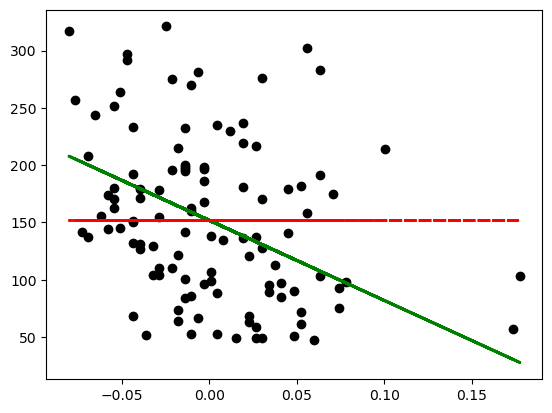

In [41]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)

# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=5, scoring = 'recall'))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


In [44]:
from sklearn.metrics import SCORERS

print(sorted(list(SCORERS.keys())))

ImportError: cannot import name 'SCORERS' from 'sklearn.metrics' (/home/mauricio/.local/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.518190537084399
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9285714285714285
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5137379705121641
Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8902652651426699


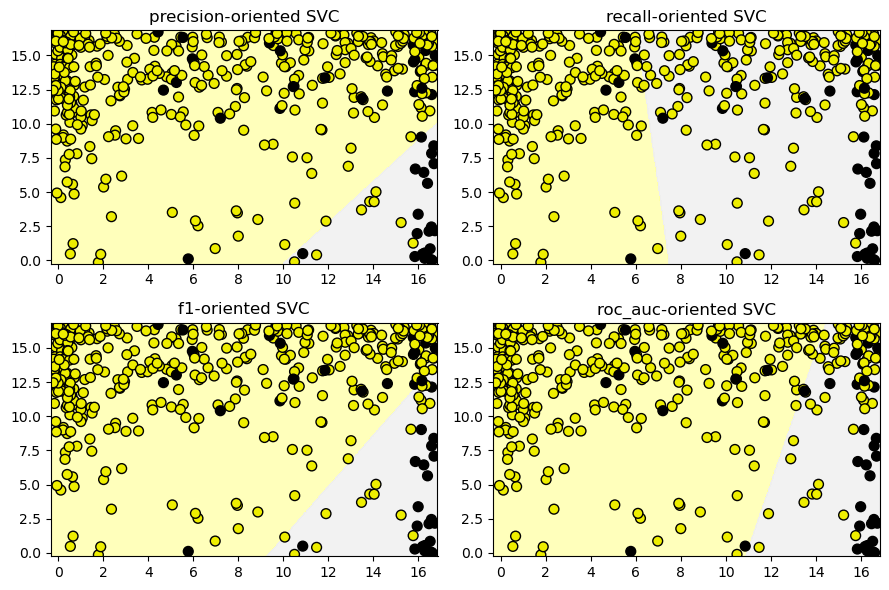

In [45]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

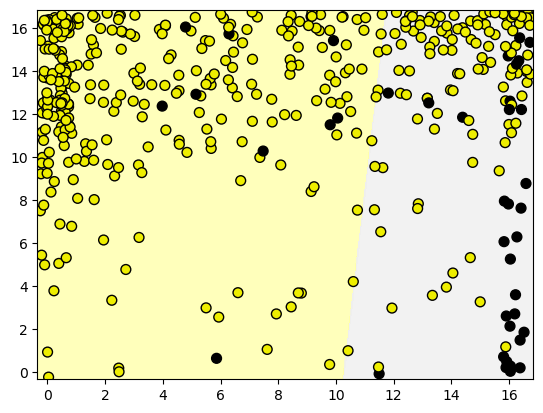

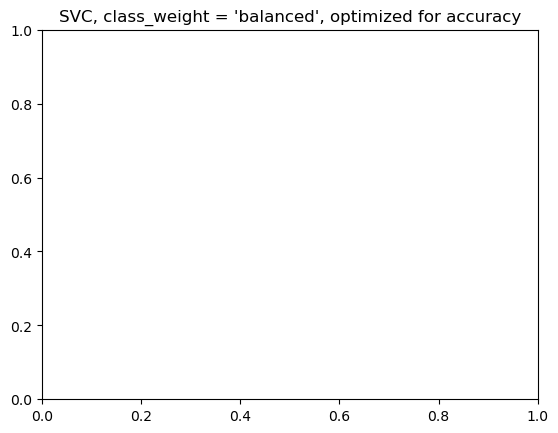

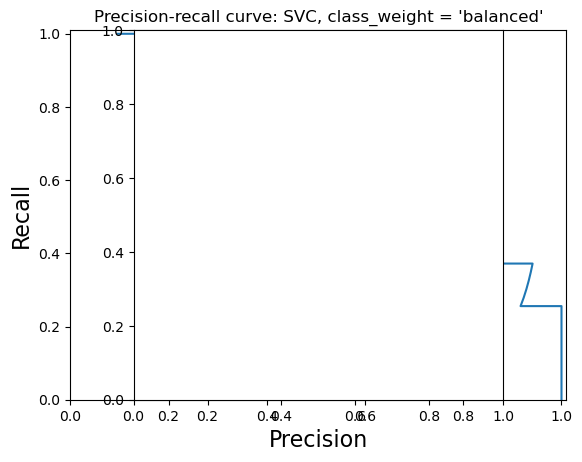

At zero threshold, precision: 0.21, recall: 0.74


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))

#### Model selection: Optimizing Classifiers for Different Evaluation Metrics

- Train/test on same data
    - Single metric
    - Typically overfits and likely won't generalize to new data.
    - But can serve as a sanity check: Low accuracy on the training set may indicate an implementation problem

- Single train/test split
    - Single metric
    - Speed and simplicity
    - Lack of variance information

- K-fold cross-validation
    - K train-test splits
    - Average metric over all splits
    - Can be combined with parameter grid search: GridSearchCV (def. cv=3)

- Training, validation, and test framework for model selectrion and evuluation
    -  Using only cross-validation or a test set to do model selection may lead to more subtle overfittiong   optimistic generalizaction estimates

- Instead, use three data splits:
    1. Training set (model building)
    2. Validation set (model selection)
    3. Test set (final evaluation)

- In practice:
    - Create an initial training/test split
    - Do cross-validation on the training data for model/parameter selection
    - Save the held-out test set for final model evaluation

- Accuracy is often not he right evaluation metric for many real-world machine learning tasks
    - False positives and false negatives may need to be treated very differently
    - Make sure you understand the needs of your application and choose an evaluation metric that matches your application, user, or business goals 

- Example of addional evaluation methods inlude:
    - Learning curve: How much does accuracy (or other metric) change as a function of the amount of training data?

- Accuracy is often not the right evaluation metric for many real-world machine learning task
    - False positives and false negatives may need to be treated very differently
    - Make sure you understand the needs of your application and choose an evaluation metric that matches your application, user, or business goals

- Ecamples of additional evaluation methods include:
    - Learning curve: How mucho does accuracy (or other metric) change as a function of the amoount of training data?

    - Sensivity analysis: How mucho does accuracy (or other metric) change as a function of key learning parameters values.

